In [7]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## The Chinook data model represents a digital media store, including tables for artists, albums, media tracks, invoices and customers.

In [3]:
# Connect to the database file
conn = sqlite3.connect("./Chinook_Sqlite.sqlite")

### Here are the tables found in the database

In [11]:
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)
print("Tables:", tables['name'].tolist())

             name
0           Album
1          Artist
2        Customer
3        Employee
4           Genre
5         Invoice
6     InvoiceLine
7       MediaType
8        Playlist
9   PlaylistTrack
10          Track
Tables: ['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice', 'InvoiceLine', 'MediaType', 'Playlist', 'PlaylistTrack', 'Track']


In [12]:
Invoice_table = pd.read_sql_query("Select * from Invoice",conn)
print(Invoice_table)

     InvoiceId  CustomerId          InvoiceDate  \
0            1           2  2009-01-01 00:00:00   
1            2           4  2009-01-02 00:00:00   
2            3           8  2009-01-03 00:00:00   
3            4          14  2009-01-06 00:00:00   
4            5          23  2009-01-11 00:00:00   
..         ...         ...                  ...   
407        408          25  2013-12-05 00:00:00   
408        409          29  2013-12-06 00:00:00   
409        410          35  2013-12-09 00:00:00   
410        411          44  2013-12-14 00:00:00   
411        412          58  2013-12-22 00:00:00   

                               BillingAddress BillingCity BillingState  \
0                     Theodor-Heuss-Straße 34   Stuttgart         None   
1                            Ullevålsveien 14        Oslo         None   
2                             Grétrystraat 63    Brussels         None   
3                              8210 111 ST NW    Edmonton           AB   
4                

## 📌 2. Top 5 Countries by Revenue

In [13]:
query = """
SELECT BillingCountry, SUM(Total) AS Revenue
FROM Invoice
GROUP BY BillingCountry
ORDER BY Revenue DESC
LIMIT 5;
"""
df_revenue = pd.read_sql_query(query, conn)



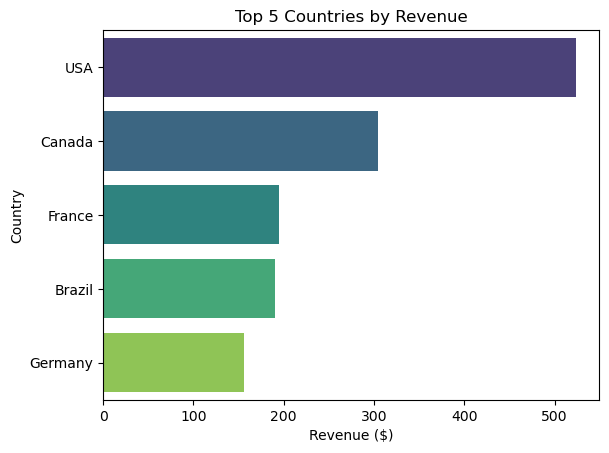

In [25]:
# Plot
sns.barplot(data=df_revenue, x='Revenue', y='BillingCountry',hue='BillingCountry',legend=False, palette='viridis')
plt.title("Top 5 Countries by Revenue")
plt.xlabel("Revenue ($)")
plt.ylabel("Country")
plt.show()


## 📌 3. Most Popular Genres by Track Count

In [26]:
query = """
SELECT g.Name AS Genre, COUNT(t.TrackId) AS TrackCount
FROM Genre g
JOIN Track t ON g.GenreId = t.GenreId
GROUP BY g.Name
ORDER BY TrackCount DESC
LIMIT 10;
"""
df_genres = pd.read_sql_query(query, conn)



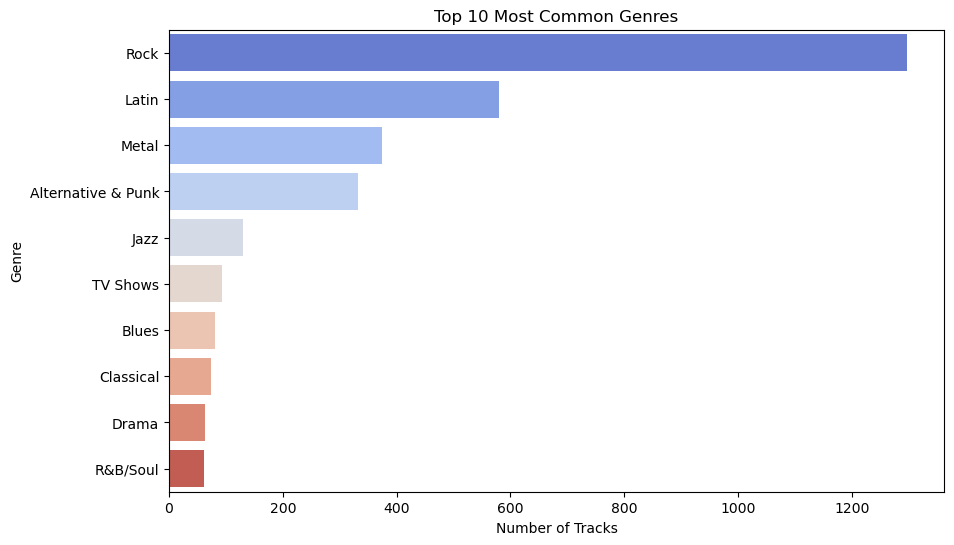

In [27]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_genres, x='TrackCount', y='Genre',hue='Genre',legend=False, palette='coolwarm')
plt.title("Top 10 Most Common Genres")
plt.xlabel("Number of Tracks")
plt.ylabel("Genre")
plt.show()


## 📌 4. Customer Spending Distribution

In [28]:
query = """
SELECT c.FirstName || ' ' || c.LastName AS CustomerName, SUM(i.Total) AS TotalSpent
FROM Customer c
JOIN Invoice i ON c.CustomerId = i.CustomerId
GROUP BY CustomerName
ORDER BY TotalSpent DESC
"""
df_customers = pd.read_sql_query(query, conn)

# Top 10 spenders
df_top = df_customers.head(10)



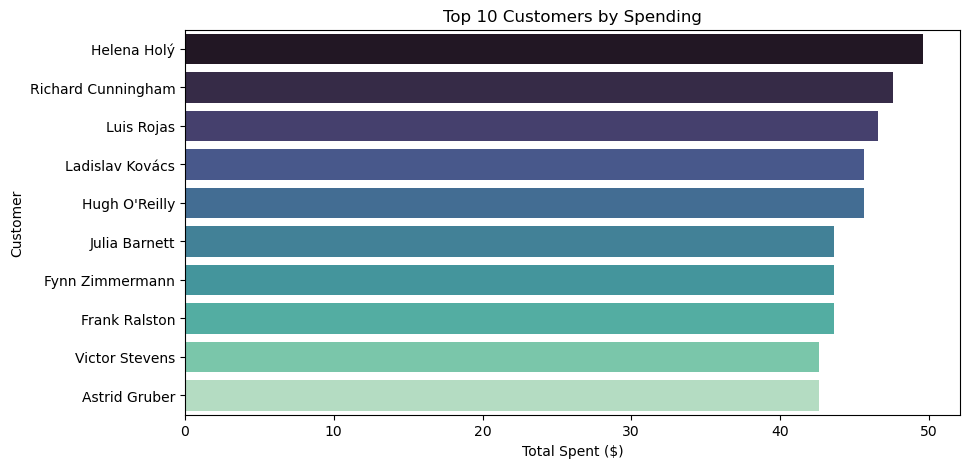

In [29]:
# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=df_top, x='TotalSpent', y='CustomerName',hue='CustomerName',legend=False, palette='mako')
plt.title("Top 10 Customers by Spending")
plt.xlabel("Total Spent ($)")
plt.ylabel("Customer")
plt.show()


## 📌 5. Artist Sales (Bonus)

In [30]:
query = """
SELECT ar.Name AS Artist, COUNT(il.InvoiceLineId) AS Sales
FROM InvoiceLine il
JOIN Track t ON il.TrackId = t.TrackId
JOIN Album al ON t.AlbumId = al.AlbumId
JOIN Artist ar ON al.ArtistId = ar.ArtistId
GROUP BY ar.Name
ORDER BY Sales DESC
LIMIT 10;
"""
df_artists = pd.read_sql_query(query, conn)



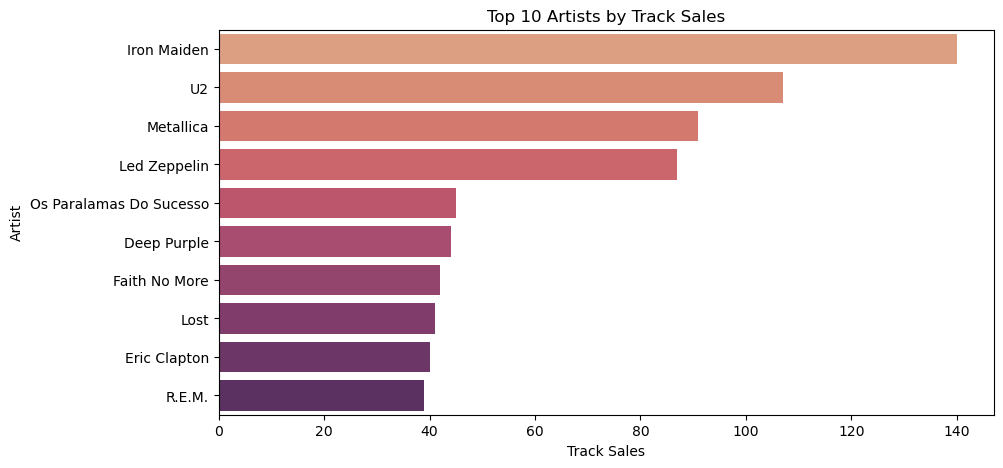

In [31]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_artists, x='Sales', y='Artist',hue='Artist',legend=False, palette='flare')
plt.title("Top 10 Artists by Track Sales")
plt.xlabel("Track Sales")
plt.ylabel("Artist")
plt.show()
